# Selecting Features for Modeling
  
This chapter goes over a few different techniques for selecting the most important features from your dataset. You'll learn how to drop redundant features, work with text vectors, and reduce the number of features in your dataset using principal component analysis (PCA).

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Feature selection
  
Once we've settled on a feature set for modeling, it's important to really consider these features. Do we need all of them, and do we know how they will impact the model?
  
**What is feature selection?**
  
Feature selection is a method of selecting features from the feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve the model's performance. Perhaps our existing feature set is much too large, or some of the features we're working with are unnecessary. There are different ways we can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests, but we won't cover these here. Most of the methods we'll cover in this chapter are more on the manual side, because it's important to truly understand our dataset before using it to train a model.
  
**When to select features**
  
In this chapter, we'll cover three specific scenarios for feature selection. Sometimes, it helps to git rid of noise in our model. Maybe we have redundant features, like having both latitude and longitude and city and state as geographical features, which can add noise. Or maybe you have features that are strongly statistically correlated, which breaks the assumptions of certain models and impacts model performance. If we're working with text vectors, we'll want to use those tf-idf vectors to determine which set of words to train our model on. And finally, if our feature set is large, it may be beneficial to use dimensionality reduction to combine and reduce the number of features in our dataset in a way that also reduces the overall variance.

### When to use feature selection
  
You've finished standardizing your data and creating new features. Which of the following scenarios is NOT a good candidate for feature selection?
  
Possible Answers

- [ ] Several columns of running times have been averaged into a new column
  
- [x] A text field that hasn't been turned into a tf/idf vector yet
  
- [ ] A column of text that has had a float extracted from it
  
- [ ] A categorical field that has been one-hot encoded
  
- [ ] There are columns related to whether something is a fruit or vegetable, the name of the fruit or vegetable, and the scientific name of the plant
  
Correct! The text field needs to be vectorized before removing it, otherwise we might lose important data.

### Identifying areas for feature selection
  
Take an exploratory look at the hiking dataset, which has already had a few different feature engineering techniques applied to it.
  
During the feature selection process, which of the following columns could be removed?
  
Possible Answers
  
- [ ] Length
  
- [ ] Difficulty
  
- [ ] Accessible
  
- [x] All of the above
  
- [ ] None of the above
  
Correct! All three of these columns are good candidates for removal during feature selection.

In [164]:
hiking = pd.read_json('../_datasets/hiking.json')
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


## Removing redundant features
  
Feature selection's main goal is to remove unnecessary features from our dataset that might create noise when modeling, so let's talk about redundant features.
  
**Redundant features**
  
One of the easiest ways to determine if a feature is unnecessary is to check if it is redundant in some way. For example, if it exists in another form as another feature, or if two features are very strongly correlated. Sometimes, when you create features through feature engineering, you end up duplicating existing features in some way. Some redundant features can be identified manually, by simply having an understanding of the features in our dataset. It should be noted that, like the machine learning process in general, feature selection is an iterative process. We might try removing some features only to find it doesn't improve our model's performance, and we might have to reassess our selection choices.
  
**Scenarios for manual removal**
  
There are a variety of scenarios in which manually removing features makes sense. The first is if our dataset contains repeated information in its feature set. For example, we may see columns related to city, state, latitude and longitude in the same dataset. Perhaps, for our modeling task, using latitude and longitude is specific enough, or perhaps we only need the high-level state information. Or, a dataset might contain if an animal is a dog or a cat and its specific breed. We might want to drop one or the other, depending on the end goal. Another scenario occurs through feature engineering. If we applied feature engineering to extract numbers from a text feature, it's unlikely that we'd need to keep the original text feature. If we took an average to use as an aggregate statistic, it's likely that we could drop the values that generated that aggregate statistic.
  
**Correlated features**
  
Another clear situation in which we'd want to drop features is when they are highly statistically correlated, meaning they move together directionally. Linear models in particular assume that features are independent of one other, and if features are strongly correlated, that could introduce bias into the model. Let's use Pearson's correlation coefficient to check a feature set for correlation. The Pearson correlation coefficient is a measure of this directionality: a score closer to 1 between pairs of features means that they move together in the same direction more strongly, a score closer to 0 means features are not correlated, and a score close to -1 means they are strongly negatively correlated, meaning one feature increases in value while the other decreases. We can calculate the Pearson correlation coefficients for each pair of features using pandas.
  
Here we have a dataset with some numerical values. To check the correlations within a dataset, we call the `.corr()` method on the DataFrame. This returns the correlation scores between each pair of features in the dataset. We can see that features A and B score close to 1, so we should likely drop one of those features.

### Selecting relevant features
  
In this exercise, you'll identify the redundant columns in the volunteer dataset, and perform feature selection on the dataset to return a DataFrame of the relevant features.
  
For example, if you explore the volunteer dataset in the console, you'll see three features which are related to location: locality, region, and postalcode. They contain related information, so it would make sense to keep only one of the features.
  
Take some time to examine the features of volunteer in the console, and try to identify the redundant features.
  
1. Create a list of redundant column names and store it in the to_drop variable:
- Out of all the location-related features, keep only postalcode.
- Features that have gone through the feature engineering process are redundant as well.
  
4. Drop the columns in the to_drop list from the dataset.
  
5. Print out the `.head()` of volunteer_subset to see the selected columns.

In [165]:
# Loading the dataset and getting it to match the exersise
volunteer = pd.read_csv('../_datasets/volunteer_sample.csv')
volunteer.dropna(subset=['category_desc'], axis=0, inplace=True)
volunteer.head()

,vol_requests,title,hits,category_desc,locality,region,postalcode,created_date,vol_requests_lognorm,created_month,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
0,2,Web designer,22,Strengthening Communities,"5 22nd St\nNew York, NY 10010\n(40.74053152272...",NY,10010.0,2011-01-14,0.693147,1,0,0,0,0,0,1
1,20,Urban Adventures - Ice Skating at Lasker Rink,62,Strengthening Communities,NaN,NY,10026.0,2011-01-19,2.995732,1,0,0,0,0,0,1
2,500,Fight global hunger and support women farmers ...,14,Strengthening Communities,NaN,NY,2114.0,2011-01-21,6.214608,1,0,0,0,0,0,1
3,15,Stop 'N' Swap,31,Environment,NaN,NY,10455.0,2011-01-28,2.708050,1,0,0,1,0,0,0
4,15,Queens Stop 'N' Swap,135,Environment,NaN,NY,11372.0,2011-01-28,2.708050,1,0,0,1,0,0,0


In [166]:
# Create a list of redundant column names to drop
to_drop = ["vol_requests", "category_desc", "locality", "region", "created_date"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of volunteer_subset
volunteer_subset.head()

,title,hits,postalcode,vol_requests_lognorm,created_month,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
0,Web designer,22,10010.0,0.693147,1,0,0,0,0,0,1
1,Urban Adventures - Ice Skating at Lasker Rink,62,10026.0,2.995732,1,0,0,0,0,0,1
2,Fight global hunger and support women farmers ...,14,2114.0,6.214608,1,0,0,0,0,0,1
3,Stop 'N' Swap,31,10455.0,2.708050,1,0,0,1,0,0,0
4,Queens Stop 'N' Swap,135,11372.0,2.708050,1,0,0,1,0,0,0


It's often easier to collect a list of columns to drop, rather than dropping them individually.

### Checking for correlated features
  
You'll now return to the wine dataset, which consists of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.
  
1. Print out the Pearson correlation coefficients for each pair of features in the wine dataset.
  
2. Drop any columns from wine that have a correlation coefficient above 0.75 with at least two other columns.

In [167]:
# Loading dataset
wine = pd.read_csv('../_datasets/wine_sample.csv')
wine.head()

,Flavanoids,Total phenols,Malic acid,OD280/OD315 of diluted wines,Hue
0,3.06,2.80,1.71,3.92,1.04
1,2.76,2.65,1.78,3.40,1.05
2,3.24,2.80,2.36,3.17,1.03
3,3.49,3.85,1.95,3.45,0.86
4,2.69,2.80,2.59,2.93,1.04


<Axes: >

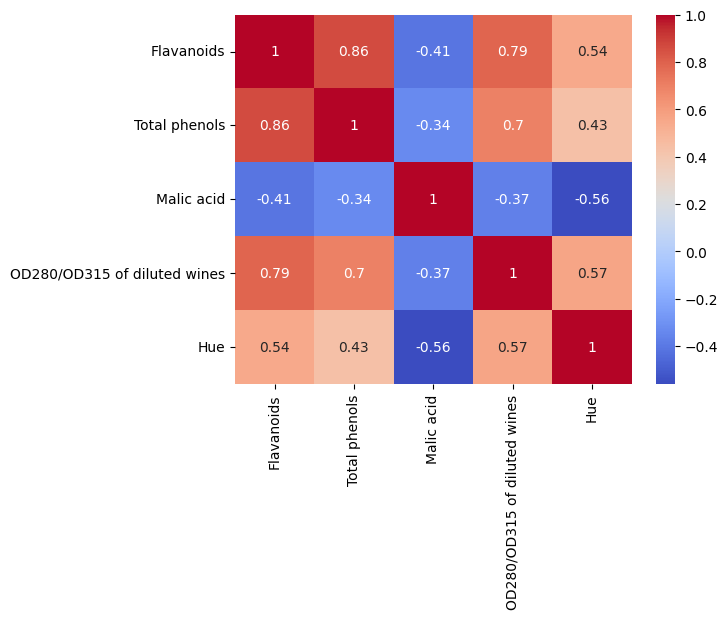

In [168]:
# Print out the column correlations of the wine dataset
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [169]:
# Drop that column from the DataFrame, 0.75 with at least two other columns.
wine = wine.drop('Flavanoids', axis=1)

wine.head()

,Total phenols,Malic acid,OD280/OD315 of diluted wines,Hue
0,2.80,1.71,3.92,1.04
1,2.65,1.78,3.40,1.05
2,2.80,2.36,3.17,1.03
3,3.85,1.95,3.45,0.86
4,2.80,2.59,2.93,1.04


Dropping correlated features is often an iterative process, so you may need to try different combinations in your model.

## Selecting features using text vectors
  
Previously, we used scikit-learn to create a tf-idf vector of text from of a dataset, but we don't necessarily need the entire vector to train a model. We could potentially select something like the top 20% of weighted words across the vector. This is a scenario where iteration is important, and it may be helpful to test out different subsets of the tf-idf vector to see what works. Rather than just blindly taking some top percentage of a tf-idf vector, let's look at how to pull out the words and their weights on a per document basis. It isn't especially straightforward to do this in scikit-learn, but it's very useful. Let's walk through the different parts we'll need to do that.
  
**Looking at word weights**
  
After we've vectorized our text, the vocabulary and weights will be stored in the vectorizer. To pull out the vocabulary list, which we'll need to look at word weights, we can use the `.vocabulary_` attribute. Here we have a vector of location descriptions from the hiking dataset, and here are the first few words in the vocabulary. Let's also take a look at the row data from the vector itself. Row data contains two components we'll need: the word weights and the index of the word. To take a look at the weight of the fourth row, for example, we use the `.data` attribute on a specific row, accessed with square bracket subsetting. To get the indices of the words that have been weighted, we use the `.indices` attribute.
  
**Looking at word weights**
  
Before putting together the vocabulary, the word indices, and their weights, we want to reverse the key value pairs in the vocabulary. It'll be easier later on if we have the index number in the key position in the dictionary. To reverse the vocabulary dictionary, we can swap the key-value pairs by grabbing the items from the vocabulary dictionary and reversing the order. If we take a look, we can see that this worked. Finally, we can also zip together the row indices and weights, pass it into the `dict()` function, and turn that into a dictionary.
  
![Alt text](../_images/word-weight-0.png)  
  
Let's pull this together into a function. We'll pass in the reversed vocab list, the vector, and the row we want to retrieve data for. We'll do row zipping to a dictionary in the function. And finally, we'll return a dictionary mapping the word to its score. So if we pass in the reversed vocabulary list (vocab), the text_tfidf vector, and the index for the 4th row (3), we now have a mapping of scores to words. At this point we could sort by score, or eliminate the words below a certain threshold.
  
![Alt text](../_images/word-weights.png)  

### Exploring text vectors, part 1
  
Let's expand on the text vector exploration method we just learned about, using the volunteer dataset's title tf/idf vectors. In this first part of text vector exploration, we're going to add to that function we learned about in the slides. We'll return a list of numbers with the function. In the next exercise, we'll write another function to collect the top words across all documents, extract them, and then use that list to filter down our text_tfidf vector.
  
1. Add parameters called original_vocab, for the tfidf_vec`.vocabulary_`, and top_n.
  
2. Call `pd.Series()` on the zipped dictionary. This will make it easier to operate on.
  
3. Use the `.sort_values()` function to sort the series and slice the index up to top_n words.
  
4. Call the function, setting original_vocab=tfidf_vec`.vocabulary_`, setting `vector_index=8` to grab the 9th row, and setting `top_n=3`, to grab the top 3 weighted words.

In [170]:
# Loading the dataset and matching it to exercise
vocab_csv = pd.read_csv('../_datasets/vocab_volunteer.csv', index_col=0).to_dict()
vocab = vocab_csv['0']
print(vocab)

{1048: 'web', 278: 'designer', 1017: 'urban', 38: 'adventures', 490: 'ice', 890: 'skating', 90: 'at', 559: 'lasker', 832: 'rink', 368: 'fight', 423: 'global', 487: 'hunger', 68: 'and', 944: 'support', 1061: 'women', 356: 'farmers', 535: 'join', 969: 'the', 708: 'oxfam', 27: 'action', 240: 'corps', 498: 'in', 680: 'nyc', 922: 'stop', 947: 'swap', 790: 'queens', 911: 'staff', 281: 'development', 992: 'trainer', 200: 'claro', 145: 'brooklyn', 1037: 'volunteer', 93: 'attorney', 221: 'community', 455: 'health', 43: 'advocates', 942: 'supervise', 189: 'children', 466: 'highland', 717: 'park', 409: 'garden', 1071: 'worldofmoney', 696: 'org', 1085: 'youth', 60: 'amazing', 791: 'race', 789: 'qualified', 133: 'board', 620: 'member', 860: 'seats', 98: 'available', 1083: 'young', 33: 'adult', 1006: 'tutor', 1016: 'updated', 11: '30', 0: '11', 513: 'insurance', 199: 'claims', 600: 'manager', 979: 'timebanksnyc', 432: 'great', 340: 'exchange', 205: 'clean', 1015: 'up', 81: 'asbury', 171: 'cementary'

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Getting the dataset matched to the exercise, subset, dropna observations in feature 
volunteer = volunteer[['category_desc', 'title']]
volunteer = volunteer.dropna(subset=['category_desc'], axis=0)

# Take the title text
title_text = volunteer['title']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

In [172]:
# Add in the rest of the parameters (this is the exercise)
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    """
    Returns the top weighted words from a vectorized representation of text.

    Parameters:
    - vocab (list): List of words representing the vocabulary.
    - original_vocab (dict): Mapping of index to original word from the vectorizer.
    - vector (scipy.sparse.csr_matrix): Vectorized representation of text.
    - vector_index (int): Index of the vector in the vector matrix.
    - top_n (int): Number of top weighted words to return.

    Returns:
    - list: List of top weighted words.

    """

    # Create a dictionary of word indices and their corresponding weights
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Transform the zipped dictionary into a pandas Series with words as indices
    zipped_series = pd.Series({vocab[i]: zipped[i] for i in vector[vector_index].indices})
    
    # Sort the series to retrieve the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    
    # Retrieve the original words corresponding to the indices
    return [original_vocab[i] for i in zipped_index]


# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, vector_index=8, top_n=3))

[189, 942, 466]


This is a little complicated, but you'll see how it comes together in the next exercise.

### Exploring text vectors, part 2
  
Using the `return_weights()` function you wrote in the previous exercise, you're now going to extract the top words from each document in the text vector, return a list of the word indices, and use that list to filter the text vector down to those top words.
  
1. Call `return_weights()` to return the top weighted words for that document.
  
2. Call `set()` on the returned filter_list to remove duplicated numbers.
  
3. Call `words_to_filter()`, passing in the following parameters: vocab for the vocab parameter, tfidf_vec`.vocabulary_` for the original_vocab parameter, text_tfidf for the vector parameter, and 3 to grab the top_n 3 weighted words from each document.
  
4. Finally, pass that filtered_words set into a list to use as a filter for the text vector.

In [173]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    """
    Returns a set of word indices to filter based on the top weighted words in a vectorized representation of text.

    Parameters:
    - vocab (list): List of words representing the vocabulary.
    - original_vocab (dict): Mapping of index to original word from the vectorizer.
    - vector (scipy.sparse.csr_matrix): Vectorized representation of text.
    - top_n (int): Number of top weighted words to consider for filtering.

    Returns:
    - set: Set of word indices to filter.

    """

    filter_list = []
    for i in range(0, vector.shape[0]):
        # Call the return_weights function and extend filter_list
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
        
    # Return the list in a set to remove duplicate word indices
    return set(filter_list)


# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, original_vocab=tfidf_vec.vocabulary_, vector=text_tfidf, top_n=3)

# Filter the columns in text_tfidf to only those in filtered_words
filtered_text = text_tfidf[:, list(filtered_words)]
print(filtered_text)


  (0, 253)	0.6821380095940299
  (0, 968)	0.7312234513930028
  (1, 768)	0.4089128467305852
  (1, 509)	0.4089128467305852
  (1, 75)	0.2211952015096988
  (1, 823)	0.3668183240931356
  (1, 30)	0.4089128467305852
  (2, 624)	0.20380137329146378
  (2, 215)	0.3097133180239295
  (2, 19)	0.3097133180239295
  (2, 652)	0.3097133180239295
  (2, 897)	0.16859216949793618
  (2, 981)	0.27783064576035155
  (2, 874)	0.22729780579979794
  (3, 876)	0.7071067811865476
  (3, 853)	0.7071067811865476
  (4, 729)	0.45885376998720473
  (4, 876)	0.6282727185580038
  (4, 853)	0.6282727185580038
  (5, 918)	0.6226835088797199
  (5, 256)	0.47384648942297736
  (5, 843)	0.6226835088797199
  (6, 77)	0.6151661434740375
  (6, 958)	0.2276734389910248
  (6, 126)	0.43738545589052213
  :	:
  (612, 625)	0.49600210945097983
  (612, 346)	0.49600210945097983
  (612, 712)	0.38733928023398656
  (612, 348)	0.20302987585336688
  (612, 958)	0.19533322522098384
  (613, 868)	0.4699182426672902
  (613, 477)	0.4699182426672902
  (613, 788)

In the next exercise, you'll train a model using the filtered vector.

### Training Naive Bayes with feature selection
  
You'll now re-run the Naive Bayes text classification model that you ran at the end of Chapter 3 with our selection choices from the previous exercise: the volunteer dataset's title and category_desc columns.
  
1. Use `train_test_split()` on the filtered_text text vector, the y labels (which is the category_desc labels), and pass the y set to the `stratify=` parameter, since we have an uneven class distribution.
  
2. Fit the nb Naive Bayes model to X_train and y_train.
  
3. Calculate the test set accuracy of nb.

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


# Instanciate model
nb = GaussianNB()

# Create y split
y = volunteer['category_desc']

# Seeding
SEED = 42

# Split the dataset according to the class distribution of category_desc
X_train, X_test, y_train, y_test = train_test_split(filtered_text.toarray(), y, stratify=y, random_state=SEED)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the models accuracy
print(nb.score(X_test, y_test))

0.5161290322580645


You can see that our accuracy score wasn't that different from the score at the end of chapter 3. That's okay; the title field is a very small text field, appropriate for demonstrating how filtering vectors works.

## Dimensionality reduction
  
A less manual way of reducing the size of our feature set is through dimensionality reduction.
  
**Dimensionality reduction and PCA**
  
Dimensionality reduction is a form of unsupervised learning that transforms our data in a way that shrinks the number of features in the feature space. This data transformation can be done in a linear or nonlinear fashion. Dimensionality reduction is really a feature extraction method, since that data is being transformed into new and different features. However, since we're treating it here as a reduction in our feature space, we'll cover it in this chapter. The method of dimensionality reduction we'll cover is principal component analysis, or PCA. 
  
PCA uses a linear transformation to project features into a space where they are completely uncorrelated. While the feature space is reduced, the variance is captured in a meaningful way by combining features into components. PCA captures, in each component, as much of the variance in the dataset as possible. In terms of feature selection, it can be a useful method when we have a large number of features and no strong candidates for elimination.
  
**PCA in scikit-learn**
  
Transforming a dataset through PCA is relatively straightforward in scikit-learn. Similar to other machine learning methods, scikit-learn requires importing pca and creating the pca object. And just like we did to create tf-idf vectors, we can use PCA's fit_transform method on the dataset we want to reduce dimensionality on. If we print out the new PCA transformed vector, we can see that the data has been transformed. By default, PCA in scikit-learn keeps the number of components equal to the number of input features. If we print out `pca.explained_variance_ratio_`, we can see, by component, the percentage of variance explained by that component. We can see that much of the variance is explained by the first component here, so it's likely that we could drop those components that don't explain much variance.
  
**PCA caveats**
  
There are a couple of things to note regarding PCA. The first is that it can be very difficult to interpret PCA components beyond which components explain the most variance. PCA is more of a black box method than other methods of dimensionality reduction. The other thing to note is that PCA is a good step to do at the end of the preprocessing journey, because of the way the data gets transformed and reshaped. It can be difficult to do much feature work post-PCA, other than eliminating components that aren't useful for explaining variance.

### Using PCA
  
In this exercise, you'll apply PCA to the wine dataset, to see if you can increase the model's accuracy.
  
1. Instantiate a PCA object.
  
2. Define the features (X) and labels (y) from wine, using the labels in the "Type" column.
  
3. Apply PCA to X_train and X_test, ensuring no data leakage, and store the transformed values as pca_X_train and pca_X_test.
  
4. Print out the `.explained_variance_ratio_` attribute of pca to check how much variance is explained by each component.

Use `.fit_transform()` when scaling the training features.  
Use `.transform()` when scaling the test features.  
Use `.fit()` when fitting the model to the scaled training features.

In [175]:
# Loading the dataset
wine = pd.read_csv('../_datasets/wine_types.csv')
wine.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [176]:
from sklearn.decomposition import PCA


# Instantiate a PCA object
pca = PCA()

# X/y split
X = wine.drop('Type', axis=1)
y = wine["Type"]

# Seeding
SEED = 42

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)

# Apply PCA to the wine dataset X vector
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.97795009e-01 2.02071827e-03 9.88350594e-05 5.66222566e-05
 1.26161135e-05 8.93235789e-06 3.13856866e-06 1.57406401e-06
 1.15918860e-06 7.49332354e-07 3.70332305e-07 1.94185373e-07
 8.08440051e-08]


 In the next exercise, you'll train a model using the PCA-transformed vector.

### Training a model with PCA
  
Now that you have run PCA on the wine dataset, you'll finally train a KNN model using the transformed data.
  
1. Fit the knn model to the PCA-transformed features, pca_X_train, and training labels, y_train.
  
2. Print the test set accuracy of the knn model using pca_X_test and y_test.

In [177]:
from sklearn.neighbors import KNeighborsClassifier


# Instanciate KNN
knn = KNeighborsClassifier()

# Fit knn to the training data
knn.fit(pca_X_train, y_train)

# Score knn on the test data and print it out
print(knn.score(pca_X_test, y_test))

0.7777777777777778


PCA turned out to be a good choice for the wine dataset.